# **Problem Statement**
**Breast cancer is one of the most common cancers among women worldwide.  
Early detection and classification of breast tumors as **malignant (cancerous)** or **benign (non-cancerous)** can significantly improve treatment outcomes**


In this project, we will:  
- Use the **Breast Cancer Wisconsin Dataset** (available in `sklearn.datasets`).  
- Perform **Exploratory Data Analysis (EDA)** to understand the dataset.  
- Train a **Decision Tree Classifier** to predict whether a tumor is benign or malignant.  
- Evaluate model performance using training and testing accuracy.  
- Visualize the trained Decision Tree for interpretability. 

In [254]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [255]:
# Loading the dataset
df = pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [256]:
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.256,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.463,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.075,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.595,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.00466,0.00000,0.00000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [257]:
df.shape

(569, 33)

In [258]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

**Checking for missing values**

In [259]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

**Checking for Outliers**

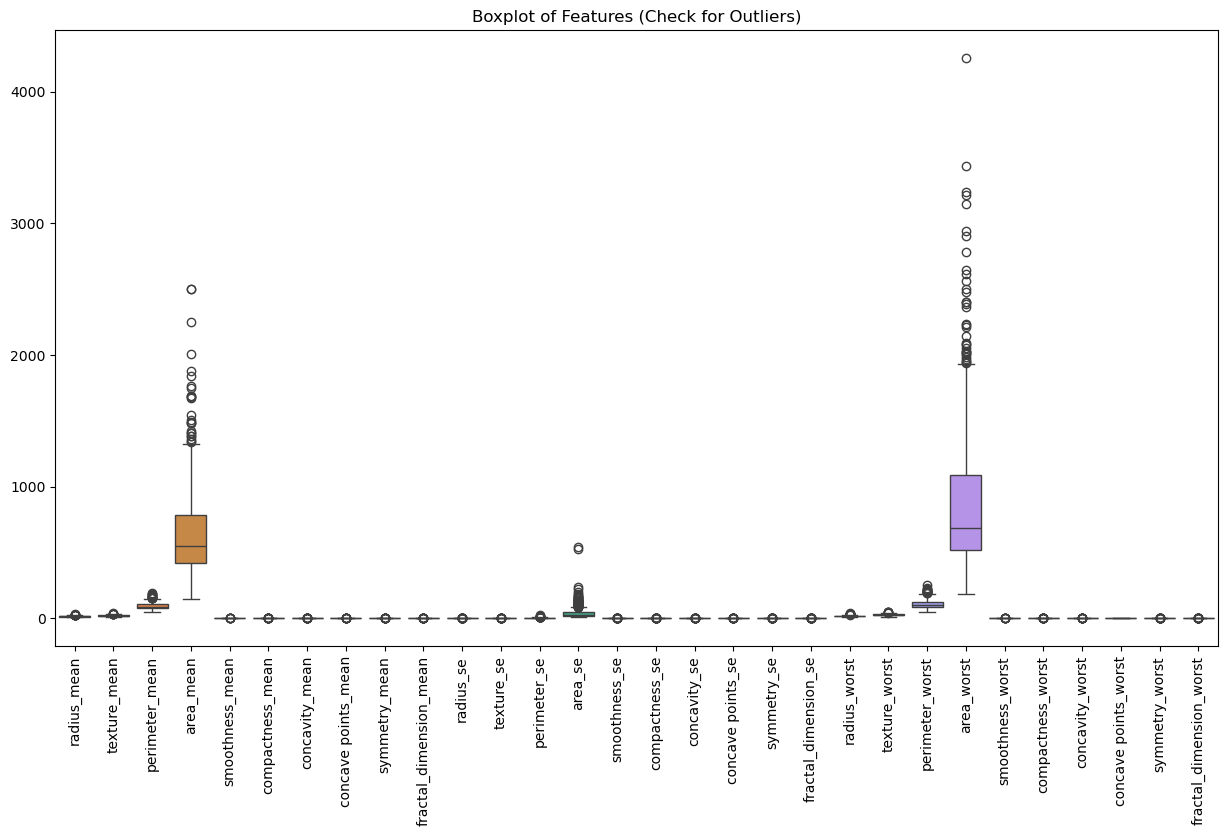

In [260]:
# Checking outliers by visualization
plt.figure(figsize=(15, 8))
sns.boxplot(data=df.drop(columns=["diagnosis","Unnamed: 32","id"], axis=1)) #
plt.xticks(rotation=90)
plt.title("Boxplot of Features (Check for Outliers)")
plt.show()

In [261]:
# Checking for outliers using IQR method

num_col = df.select_dtypes(include=['int64','float64']).columns


for col in num_col:

    col_data = df[col].dropna()
    Q1 = np.percentile(df[col],25,interpolation='midpoint')
    Q3 = np.percentile(df[col],75,interpolation='midpoint')


    IQR = Q3 - Q1
    lower = Q1 - (IQR*1.5)
    upper = Q3 + (IQR*1.5)

    outliers = col_data[(col_data < lower) | (col_data > upper)]



    print(f"Column : {col}")
    print(f"Number of outliers: {outliers.shape[0]}")

Column : id
Number of outliers: 81
Column : radius_mean
Number of outliers: 14
Column : texture_mean
Number of outliers: 7
Column : perimeter_mean
Number of outliers: 13
Column : area_mean
Number of outliers: 25
Column : smoothness_mean
Number of outliers: 6
Column : compactness_mean
Number of outliers: 16
Column : concavity_mean
Number of outliers: 18
Column : concave points_mean
Number of outliers: 10
Column : symmetry_mean
Number of outliers: 15
Column : fractal_dimension_mean
Number of outliers: 15
Column : radius_se
Number of outliers: 38
Column : texture_se
Number of outliers: 20
Column : perimeter_se
Number of outliers: 38
Column : area_se
Number of outliers: 65
Column : smoothness_se
Number of outliers: 30
Column : compactness_se
Number of outliers: 28
Column : concavity_se
Number of outliers: 22
Column : concave points_se
Number of outliers: 19
Column : symmetry_se
Number of outliers: 27
Column : fractal_dimension_se
Number of outliers: 28
Column : radius_worst
Number of outli

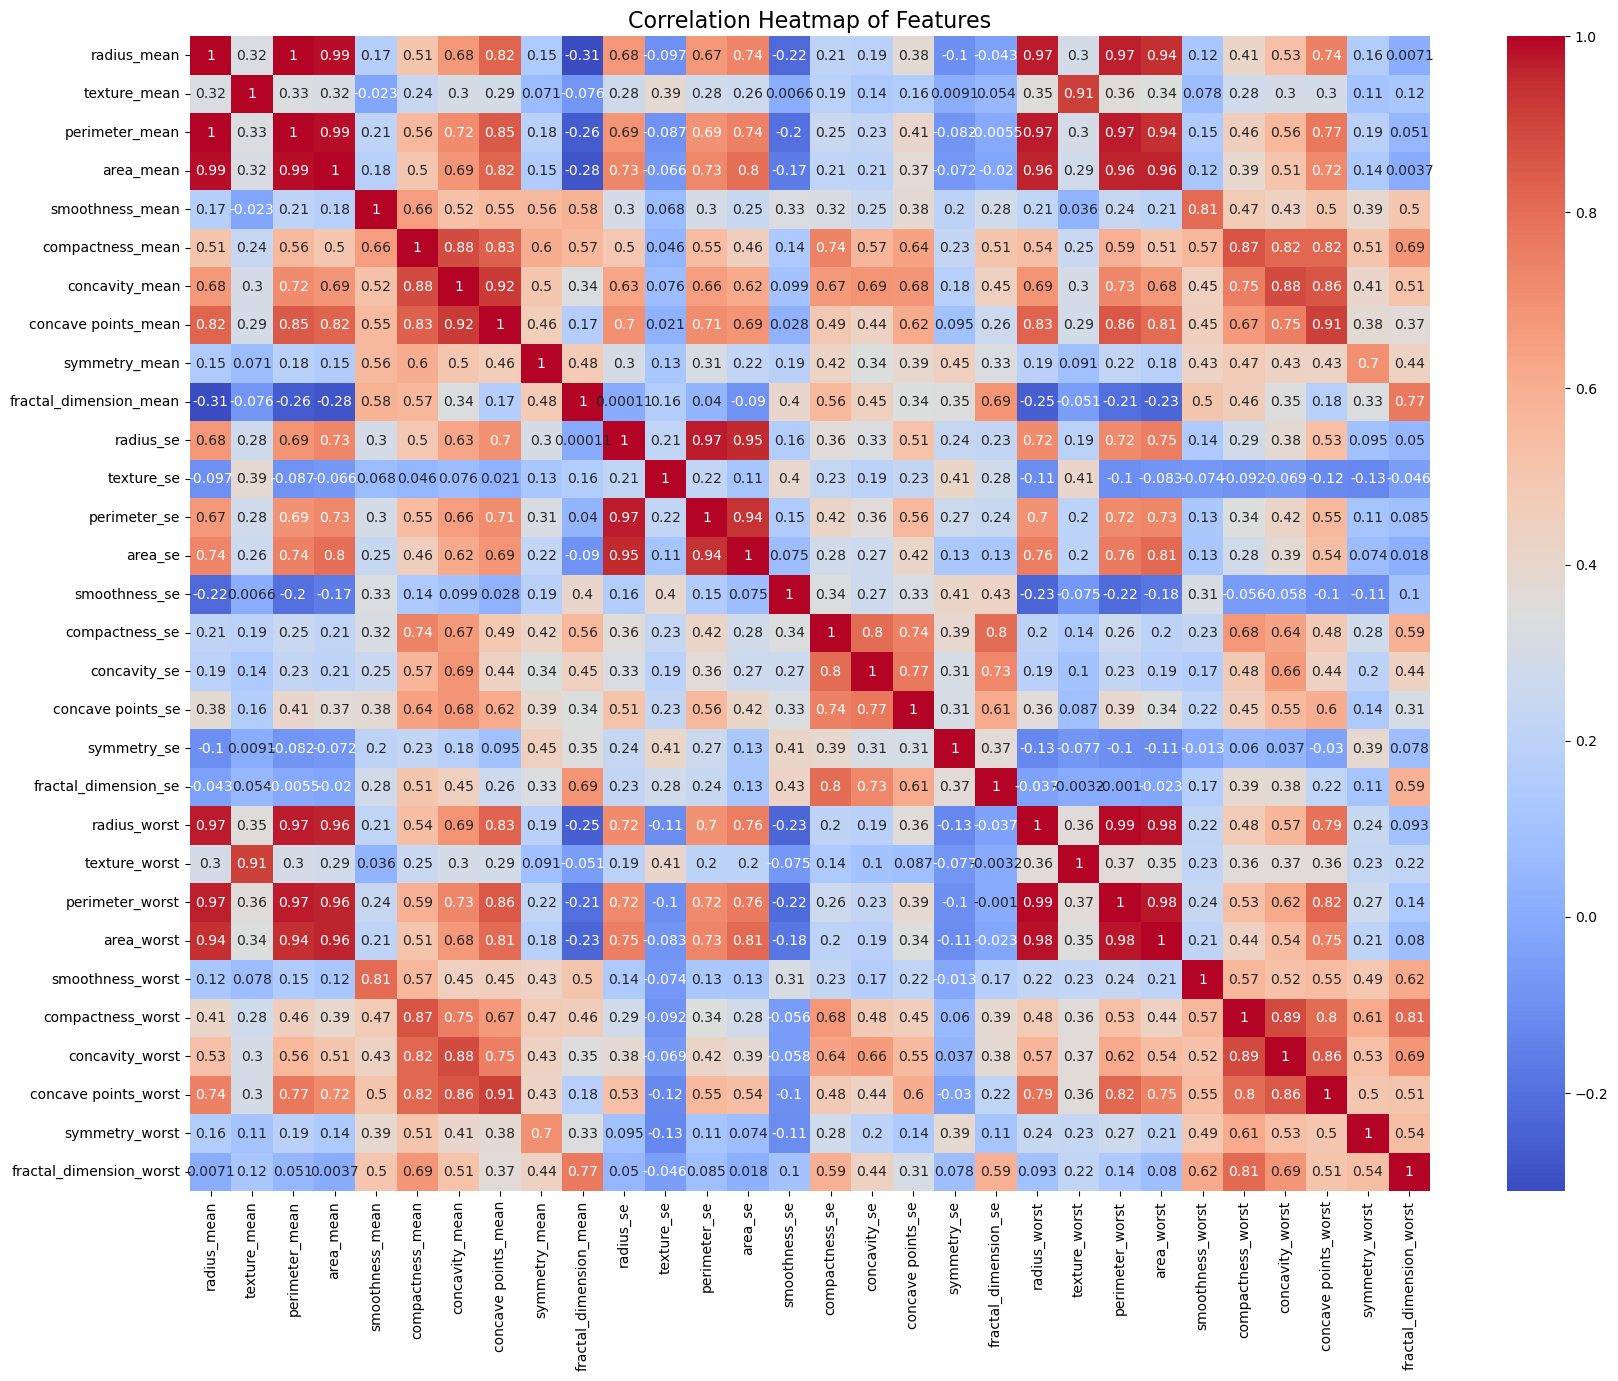

In [262]:
# Drop unnecessary + non-numeric columns
df_corr = df.drop(columns=["id", "Unnamed: 32", "diagnosis"])
# Compute correlation
corr_matrix = df_corr.corr()
# Plot heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Features", fontsize=16)
plt.show()

**Checking for duplicate Values**

In [263]:
df.duplicated().any()

np.False_

**Checking data is balanced or not**

In [264]:
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

**As from the outcome we can see that our dataset is not balance so to avoid biasness we need to balance it in training part**

# **Exploration Summary**

- **Shape**: 569 rows × 33 columns  
- **Target**: `diagnosis` (M=Malignant, B=Benign)  
- **Drop**: `id` (identifier), `Unnamed: 32` (empty)  
- **Keep**: `diagnosis` + 30 numeric features (`_mean`, `_se`, `_worst`)  

---

## **Outliers**
- Found in many numeric columns (e.g., `area_mean`, `radius_se`).  
- Represent true rare medical cases → **do not drop**, just scale.  

---

## **Next Steps**
1. Drop `id` and `Unnamed: 32`  
2. Encode `diagnosis` (M=1, B=0)  
3. Scale numeric features (StandardScaler/RobustScaler)  


# **Data Preprocessing**

In [265]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [266]:
# Dropping Unessary Columns
df.drop(columns=['id','Unnamed: 32'],inplace=True)


In [267]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [268]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

**Data Tranformation**

In [269]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


**Spliting**

In [270]:
# Seprate features and target
y = df['diagnosis']
X = df.drop(columns=['diagnosis'],axis=1)
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


**Scaling and Encoding** 

In [271]:
from sklearn.preprocessing import RobustScaler, LabelEncoder

**Scaled the data, but did not use it for training since Decision Trees do not require scaling**


In [272]:
scaler = RobustScaler()
X_Scaled = scaler.fit_transform(X)
X_Scaled = pd.DataFrame(X_Scaled,columns=X.columns)
X_Scaled.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.132353,-1.502664,1.263740,1.241446,1.190174,2.824832,2.358711,2.115850,1.855030,2.039192,3.126978,-0.316669,3.599086,4.713606,0.006382,1.475994,1.032641,0.698529,1.358173,1.301299,1.801038,-0.935185,2.105595,2.343063,1.051020,2.364252,1.807750,1.715248,2.635556,1.884578
1,1.764706,-0.190053,1.612859,2.138245,-0.587956,-0.213653,0.250742,0.682995,0.059172,-0.578385,0.889655,-0.584440,0.634495,1.812363,-0.387974,-0.380485,-0.270401,0.349265,-0.581731,0.149351,1.733564,-0.231481,1.480746,2.232284,-0.255102,-0.131839,0.055514,0.892194,-0.106667,0.435500
2,1.549020,0.428064,1.512617,1.798841,0.725304,1.027337,1.343287,1.758242,0.819527,-0.184086,1.709533,-0.501640,1.312393,2.542063,-0.077259,1.012390,0.461053,1.364536,0.453125,0.599134,1.487889,0.013889,1.328167,1.797960,0.445578,1.107869,0.833458,1.483052,1.171852,0.365664
3,-0.477941,0.273535,-0.299343,-0.455298,2.463286,2.921045,1.778327,1.335444,2.381657,4.263658,0.695335,0.074988,0.661336,0.098756,0.917031,2.794528,1.139466,1.094457,4.915865,2.606494,-0.010381,0.126157,0.029305,-0.208897,2.670068,3.410109,1.714605,1.633358,5.653333,4.508244
4,1.696078,-0.799290,1.688904,2.058223,0.234020,0.613470,1.349219,1.318681,0.050296,-0.321853,1.756592,-0.510389,1.799543,2.557059,1.716493,0.214765,1.149481,1.119910,-0.140625,0.834632,1.309689,-1.011574,1.320901,1.562335,0.207483,-0.035956,0.645678,0.648595,-0.678519,-0.158099


**Encoding**

In [273]:

# Encode the target
le = LabelEncoder()
y = pd.DataFrame(le.fit_transform(y))  # B -> 0, M -> 1
y.head()

,0
0,1
1,1
2,1
3,1
4,1


# **Model Selection**

In [274]:
# sns.pairplot(df, hue="diagnosis")

**Commented out: This scatter plot was used only during exploration** 
**to visualize feature relationships while selecting the model** 
**It has been disabled here to keep the notebook clean and viewable on GitHub.**

**Considering the data we can use decsion tree model**

# **Model Training**

In [275]:

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

In [276]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Synthetic Minority Over-sampling Technique**

In [277]:
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

**Confirming Oversampling**

In [278]:
print("Before SMOTE:", y_train.value_counts())

Before SMOTE: 0
0    286
1    169
Name: count, dtype: int64


In [279]:
print("After SMOTE:", y_train_res.value_counts())

After SMOTE: 0
0    286
1    286
Name: count, dtype: int64


**Training the model**

In [280]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(min_samples_split=10, min_samples_leaf=5, random_state=42,max_depth=5)
dt_model.fit(X_train_res, y_train_res)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,10
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


**Feature Selection**

Feature Selection is being performed to identify the most important predictors for the model

In [281]:
# Feature importances
importances = pd.Series(dt_model.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

In [282]:
# Select top 7 features
top_features = importances.head(6).index.tolist()
print("\nSelected Features:", top_features)


Selected Features: ['concave points_mean', 'radius_worst', 'concavity_worst', 'texture_worst', 'perimeter_worst', 'perimeter_se']


In [283]:
# Train model again on selected features
X_train_res_sel = X_train_res[top_features]
X_test_sel = X_test[top_features]

In [284]:
X_train_res_sel.head()

,concave points_mean,radius_worst,concavity_worst,texture_worst,perimeter_worst,perimeter_se
0,0.04375,10.31,1.25200,22.65,65.50,1.885
1,0.14960,26.68,0.67800,33.48,176.50,4.414
2,0.02180,10.01,0.13970,19.23,65.59,2.608
3,0.01615,12.25,0.11250,35.19,77.98,1.497
4,0.01290,11.02,0.02168,17.45,69.86,3.312


In [285]:
dt_sel = DecisionTreeClassifier(min_samples_split=10, min_samples_leaf=5, random_state=42,max_depth=5)
dt_sel.fit(X_train_res_sel, y_train_res)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,10
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


**Visualization**

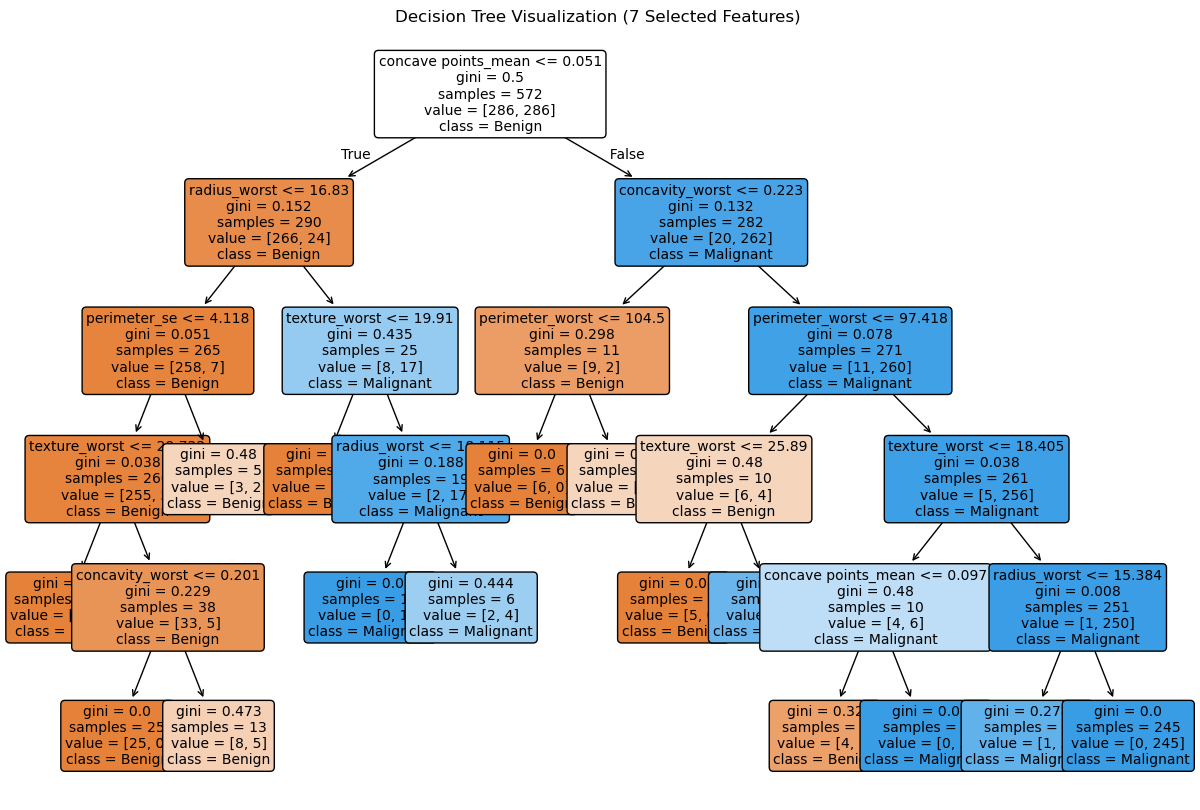

In [286]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
plot_tree(
    dt_sel,  
    filled=True,
    feature_names=X_train_res_sel.columns,  
    class_names=['Benign', 'Malignant'],
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Visualization (7 Selected Features)")
plt.show()


# **Model Evaluation**

In [287]:
# Predictions with 7-feature model
y_pred = dt_sel.predict(X_test_sel)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred) * 100)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))



Accuracy: 97.36842105263158

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


Confusion Matrix:
 [[70  1]
 [ 2 41]]


 **Checking Overfitting and Underfitting**

In [288]:
# Accuracy for 7-feature model
train_acc = dt_sel.score(X_train_res_sel, y_train_res)
test_acc  = dt_sel.score(X_test_sel, y_test)

print("Train Accuracy:", train_acc * 100)
print("Test Accuracy :", test_acc * 100)

Train Accuracy: 97.55244755244755
Test Accuracy : 97.36842105263158


# **Visualizing the results**

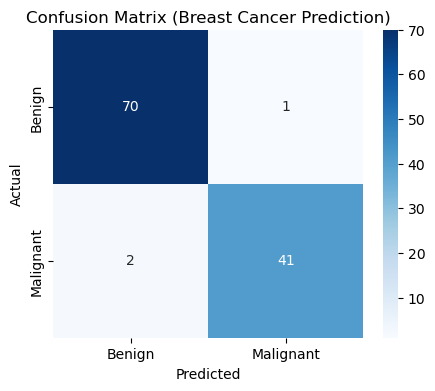

In [289]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign','Malignant'],
            yticklabels=['Benign','Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Breast Cancer Prediction)')
plt.show()

# **Saving the model**

In [290]:
import joblib

joblib.dump(dt_sel, "cancer.pkl")

['cancer.pkl']

## 🏁 **Conclusion**

This project demonstrates an end-to-end machine learning workflow to classify breast tumors as **benign** or **malignant** using the Breast Cancer dataset.

### 🔑 Key Insights:
- Initially, the model was trained on all **30 features**, achieving strong performance (Train ≈ 97%, Test ≈ 95%).
- Using **feature importance–based selection**, the model was retrained with only the **top 6 features**, achieving  
  **Train Accuracy: 97.55%** and **Test Accuracy: 97.36%**.
- This confirms that many features were **redundant**, and a smaller subset of well-chosen features can provide equal or even better predictive power.
- The **confusion matrix analysis** validated the model’s reliability, though minimizing **false negatives** remains the highest priority in real-world healthcare.
- Overall, this project shows how combining **data analysis, feature selection, and interpretable models** can create an efficient and reliable solution for **early breast cancer detection**.





